# How to handling OBD(object detection) data
tfds로 데이터 핸들링<br>

0. 기본 기능
1. Pascal voc data 사용


tfds 사용 References
- https://www.tensorflow.org/datasets/catalog/coco
- https://blog.tensorflow.org/2019/02/introducing-tensorflow-datasets.html?hl=ko
- https://rfriend.tistory.com/527
- https://teddylee777.github.io/tensorflow/tfds-datasets

## 0. 기본 기능 익히기
list_builders, load, info, take, map

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

import cv2
import random

In [2]:
%matplotlib inline

In [3]:
# list_builders
tfds.list_builders() # 등록된 데이터셋 리스트 조회

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [4]:
# load: 데이터셋 로드 2가지 방법

# builder 설정 후 데이터셋 로드
builder_dataset = tfds.builder('cifar10')
builder_dataset.download_and_prepare()

# split을 통한 train/test 별개로 데이터셋 로드 - 바로 split하여 load가능
train_dataset, train_info = tfds.load(name='cifar10', split=tfds.Split.TRAIN, with_info=True)
test_dataset, test_info = tfds.load(name='cifar10', split=tfds.Split.TEST, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteYRQJ93/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteYRQJ93/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


3. info: 데이터셋 속성 정보확인

In [5]:
builder_dataset.info 

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [6]:
# info는 내용이 동일
train_info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [7]:
builder_train_dataset = builder_dataset.as_dataset(split=tfds.Split.TRAIN)
builder_test_dataset = builder_dataset.as_dataset(split=tfds.Split.TEST)

In [8]:
builder_dataset.info.splits['train'].num_examples # train 개수

50000

In [9]:
builder_dataset.info.splits['test'].num_examples # test 개수

10000

In [10]:
# 하나씩 데이터셋 불러옴
for data in builder_train_dataset:
  print(data.keys())
  print(data['id'])
  print(data['image'].shape)
  print(data['label'])
  break

dict_keys(['id', 'image', 'label'])
tf.Tensor(b'train_16399', shape=(), dtype=string)
(32, 32, 3)
tf.Tensor(7, shape=(), dtype=int64)


In [11]:
# take 메소드를 이용하여 데이터셋 여러장 불러옴
# .take(N): N장 데이터를 불러옴
for data in builder_train_dataset.take(3):
  print(data['id'], data['image'].shape, data['label'])

tf.Tensor(b'train_16399', shape=(), dtype=string) (32, 32, 3) tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(b'train_01680', shape=(), dtype=string) (32, 32, 3) tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(b'train_47917', shape=(), dtype=string) (32, 32, 3) tf.Tensor(4, shape=(), dtype=int64)


In [12]:
data['image'].numpy().max()

172

In [13]:
# maaping하여 normalize하기
# reference: https://teddylee777.github.io/tensorflow/tfds-datasets
def normalize(dataset):    
    """(데이터, 레이블) 형태로 리턴"""
    image, label = tf.cast(dataset['image'], tf.float32) / 255.0, dataset['label']
    return image, label

In [14]:
# normalize mapping & batch setting
norm_dataset = builder_train_dataset.map(normalize).batch(32)

In [15]:
norm_dataset # (데이터, 레이블)

<BatchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>

In [16]:
for data, label in norm_dataset:
  print(data.shape, label.shape) # batch 개수만큼
  break

(32, 32, 32, 3) (32,)


In [17]:
print(label.numpy()[:10])

[7 8 4 4 6 5 2 9 6 6]


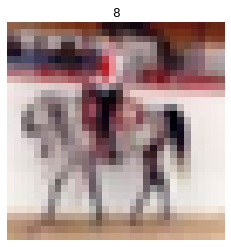

In [18]:
plt.imshow(data[0][:].numpy())
plt.title('{}'.format(label[1].numpy()))
plt.axis("off")
plt.show()

##2. Pascal voc data 사용
- PASCAL Visual Object Classes Homepage: http://host.robots.ox.ac.uk:8080/pascal/VOC/voc2007/

In [19]:
# train 데이터 셋 불러와 형식 확인
pascal_train, info = tfds.load(name='voc/2007', split=tfds.Split.TRAIN, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/voc/2007/4.0.0.incompleteG9OVDD/voc-test.tfrecord


  0%|          | 0/4952 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/voc/2007/4.0.0.incompleteG9OVDD/voc-train.tfrecord


  0%|          | 0/2501 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/voc/2007/4.0.0.incompleteG9OVDD/voc-validation.tfrecord


  0%|          | 0/2510 [00:00<?, ? examples/s]

Dataset voc downloaded and prepared to /root/tensorflow_datasets/voc/2007/4.0.0. Subsequent calls will reuse this data.


- PASCAL2007 voc 데이터 클래스는 20개
- 학습:평가:테스트 = 1:1:2 비율
- * 주로 Objecct Detection에서 사용하는 key들
  - 'image': 사용이미지(height, width, channel)
  - 'objects'
    - 'bbox': (ymin / height, xmin / width, ymax / height, xmax / width), 해당 박스의 비율로
    - 'is_difficult': 인식하기 어려운지 여부
    - 'is_truncated': 오브젝트가 해당 이미지에 온전히 표현되지 못했는지 여부
    - 'label': 클래스
    - 'pose': 오브젝트의 방향성

Reference
- https://www.tensorflow.org/datasets/catalog/voc#voc2007_default_config
- https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/object_detection/voc.py


In [20]:
info

tfds.core.DatasetInfo(
    name='voc',
    version=4.0.0,
    description='This dataset contains the data from the PASCAL Visual Object Classes Challenge
2007, a.k.a. VOC2007, corresponding to the Classification and Detection
competitions.
A total of 9963 images are included in this dataset, where each image
contains a set of objects, out of 20 different classes, making a total of
24640 annotated objects.
In the Classification competition, the goal is to predict the set of labels
contained in the image, while in the Detection competition the goal is to
predict the bounding box and label of each individual object.
annotations.',
    homepage='http://host.robots.ox.ac.uk/pascal/VOC/voc2007/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'labels': Sequence(ClassLabel(shape=(), dtype=tf.int64, num_classes=20)),
        'labels_no_difficult': Sequence(ClassLabel(shape=(), dtype=t

In [21]:
label

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([7, 8, 4, 4, 6, 5, 2, 9, 6, 6, 9, 9, 3, 0, 8, 7, 9, 0, 4, 9, 0, 8,
       6, 4, 2, 8, 8, 7, 0, 8, 4, 2])>

In [22]:
_VOC_LABELS = (
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor",
)
_VOC_POSES = (
    "frontal",
    "rear",
    "left",
    "right",
    "unspecified",
)

In [23]:
color_map = {
    0: (255,0,0),
    1: (0,255,0),
    2: (0,0,255),
    3: (255,255,255),
    4:(232,215,0),
    5:(255,145,0),
}

image/filename:  b'007308.jpg'
labels_no_difficult:  [12 14]
objects:  dict_keys(['bbox', 'is_difficult', 'is_truncated', 'label', 'pose'])
	 bbox :  [[0.14375    0.0437018  0.97083336 0.7763496 ]
 [0.14583333 0.24164525 0.57916665 0.6066838 ]
 [0.6        0.5244216  0.8541667  0.76606685]
 [0.56041664 0.5012854  0.7395833  0.6863753 ]]
	 is_difficult :  [False False False  True]
	 is_truncated :  [False False  True  True]
	 label :  [12 14 12 14]
	 pose :  [4 4 4 4]
===image===
Label:  ['horse', 'person']


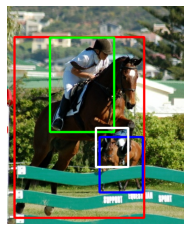

In [24]:
for data in pascal_train.take(1):
    image, label = data['image'], data['labels']
    print('image/filename: ', data['image/filename'].numpy())
    print('labels_no_difficult: ', data['labels_no_difficult'].numpy())
    print('objects: ', data['objects'].keys())
    for k, v in data['objects'].items():
      print('\t', k, ': ', v.numpy())


    print('===image===')
    print("Label: ", [_VOC_LABELS[c] for c in label.numpy()])


    ###===image bbox 표시===###
    img_copy = image.numpy().copy()
    object_num = len(data['objects']['label'])
    original_h = image.shape[0]
    original_w = image.shape[1]
    for i in range(object_num):
      rect = data['objects']['bbox'].numpy()[i,:]
      ymin = int(rect[0]*original_h) # ymin
      xmin = int(rect[1]*original_w) # xmin
      ymax = int(rect[2]*original_h)
      xmax = int(rect[3]*original_w)
  
      img_copy = cv2.rectangle(img_copy, (xmin, ymin), (xmax, ymax), color=color_map[i], thickness=3)


plt.imshow(img_copy)
plt.axis('off')
plt.show()

In [25]:
object_num

4

In [26]:
print((xmin, ymin), (xmax, ymax))

(195, 268) (266, 354)


In [27]:
image.shape

TensorShape([480, 389, 3])

In [28]:
data['objects']['bbox'].numpy()

array([[0.14375   , 0.0437018 , 0.97083336, 0.7763496 ],
       [0.14583333, 0.24164525, 0.57916665, 0.6066838 ],
       [0.6       , 0.5244216 , 0.8541667 , 0.76606685],
       [0.56041664, 0.5012854 , 0.7395833 , 0.6863753 ]], dtype=float32)

In [29]:
color_map[i]

(255, 255, 255)

In [30]:
# 특정 클래스만 필터링하기
# Reference : https://stackoverflow.com/questions/55731774/filter-dataset-to-get-just-images-from-specific-class
filter_num = 18.0
def predicate(x, allowed_labels=tf.constant([filter_num])):
  """
  filter_num 데이터만 정재해서
  """
  label = x['objects']['label']
  isallowed = tf.equal(allowed_labels, tf.cast(label, tf.float32))
  reduced = tf.reduce_sum(tf.cast(isallowed, tf.float32))

  return tf.greater(reduced, tf.constant(0.))

In [31]:
train_dataset_filtered = pascal_train.filter(predicate)

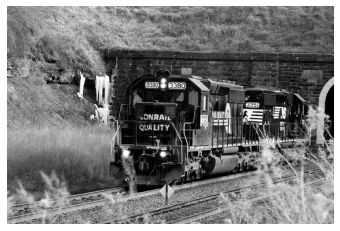

In [32]:
for data in train_dataset_filtered.take(1):
    image, label = data['image'], data['labels']
    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    plt.axis('off')

In [33]:
# 데이터 배치 사이즈 + 가변적인 데이터에 대해 padding 추가
batch_size = 10
padded_train_dataset = train_dataset_filtered.padded_batch(batch_size)

(10, 493, 500, 3)


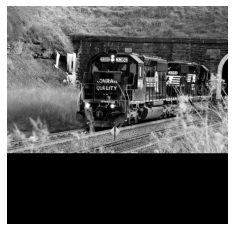

In [34]:
for data in padded_train_dataset.take(1):
    image, label = data['image'], data['labels'] 
    print(image.shape) # 배치 사이즈 확인
    plt.imshow(image.numpy()[0, :, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    plt.axis('off')

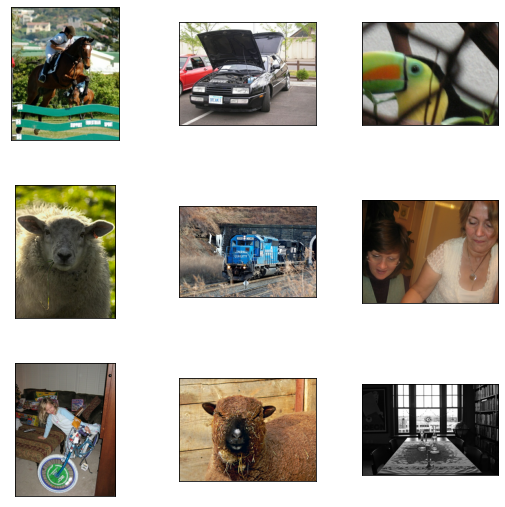

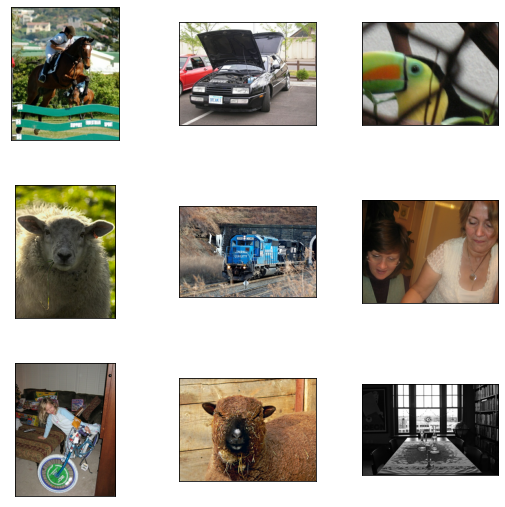

In [35]:
tfds.show_examples(pascal_train, info)

,image,image/filename,labels,labels_no_difficult,objects/bbox,objects/is_difficult,objects/is_truncated,objects/label,objects/pose
0,,007308.jpg,"ndarray(shape=(2,), dtype=int64)","ndarray(shape=(2,), dtype=int64)","ndarray(shape=(4, 4), dtype=float32)","ndarray(shape=(4,), dtype=bool)","ndarray(shape=(4,), dtype=bool)","ndarray(shape=(4,), dtype=int64)","ndarray(shape=(4,), dtype=int64)"
1,,006362.jpg,array([6]),array([6]),"ndarray(shape=(2, 4), dtype=float32)","ndarray(shape=(2,), dtype=bool)","ndarray(shape=(2,), dtype=bool)","ndarray(shape=(2,), dtype=int64)","ndarray(shape=(2,), dtype=int64)"
2,,007991.jpg,array([2]),array([2]),"ndarray(shape=(1, 4), dtype=float32)",array([False]),array([False]),array([2]),array([2])
3,,005363.jpg,array([16]),array([16]),"ndarray(shape=(1, 4), dtype=float32)",array([False]),array([ True]),array([16]),array([0])
4,,001612.jpg,array([18]),array([18]),"ndarray(shape=(1, 4), dtype=float32)",array([False]),array([False]),array([18]),array([4])
5,,005024.jpg,array([14]),array([14]),"ndarray(shape=(2, 4), dtype=float32)","ndarray(shape=(2,), dtype=bool)","ndarray(shape=(2,), dtype=bool)","ndarray(shape=(2,), dtype=int64)","ndarray(shape=(2,), dtype=int64)"
6,,003395.jpg,"ndarray(shape=(3,), dtype=int64)","ndarray(shape=(2,), dtype=int64)","ndarray(shape=(3, 4), dtype=float32)","ndarray(shape=(3,), dtype=bool)","ndarray(shape=(3,), dtype=bool)","ndarray(shape=(3,), dtype=int64)","ndarray(shape=(3,), dtype=int64)"
7,,005223.jpg,array([16]),array([16]),"ndarray(shape=(1, 4), dtype=float32)",array([False]),array([ True]),array([16]),array([4])
8,,000950.jpg,"ndarray(shape=(2,), dtype=int64)",array([10]),"ndarray(shape=(5, 4), dtype=float32)","ndarray(shape=(5,), dtype=bool)","ndarray(shape=(5,), dtype=bool)","ndarray(shape=(5,), dtype=int64)","ndarray(shape=(5,), dtype=int64)"
9,,009272.jpg,array([0]),array([0]),"ndarray(shape=(1, 4), dtype=float32)",array([False]),array([False]),array([0]),array([3])

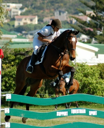
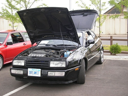
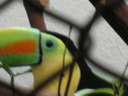
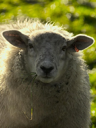
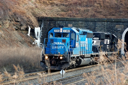
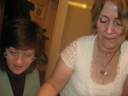
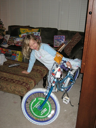
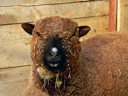
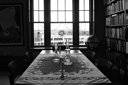
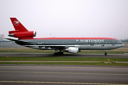

In [37]:
tfds.as_dataframe(pascal_train.take(10), info)